In [121]:
import numpy as np
import pandas as pd

# 设置pandas的显示选项，将最大行数设置为None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [122]:
df = pd.read_excel(r".\data\company_data.xlsx",dtype={'股票代码': str,'时间': str})

In [123]:
# 假设数据框名为df
# 先记录下原始的数据框的行数
original_rows = df.shape[0]

# 定义一个空列表用于记录去掉某一列后剩余的数据行数
rows_after_dropna = []

# 遍历每一列并进行dropna操作，记录下每次操作后的剩余数据行数
for col in df.columns:
    temp_df = df.drop(col, axis=1).dropna()
    rows_after_dropna.append(temp_df.shape[0])

# 找到剩余数据最多的那次dropna操作对应的列名
best_col = df.columns[rows_after_dropna.index(max(rows_after_dropna))]

# 输出去掉best_col列后，剩余数据最多的情况
print(f"The best column to drop is {best_col}.")
print(f"After dropping this column, the dataframe still has {max(rows_after_dropna)} out of {original_rows} rows.")

The best column to drop is 应收账款.
After dropping this column, the dataframe still has 28 out of 2347 rows.


In [124]:


def missing_values(df):
    # 计算每一列的缺失值数量
    missing_count = df.isna().sum()
    # 计算每一列的缺失值占比
    missing_percentage = missing_count / len(df) * 100
    # 将结果合并为一个 DataFrame
    missing_data = pd.concat([missing_count, missing_percentage], axis=1)
    missing_data.columns = ['缺失值数量', '缺失值占比']
    # 按照缺失值占比从高到低排序
    missing_data = missing_data.sort_values(by='缺失值占比', ascending=False)
    return missing_data


In [125]:
missing_data = missing_values(df)
# missing_data.to_excel('./data/缺失值.xlsx')

In [126]:
def drop_missing_columns(df, threshold=0.3):
    """
    剔除缺失值比例大于threshold的列
    """
    missing_ratio = df.isna().mean()
    columns_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
    df_dropped = df.drop(columns_to_drop, axis=1)
    return df_dropped

In [127]:
df_dropped = drop_missing_columns(df, threshold=0.5)
df_dropped= df_dropped.dropna()
df_dropped = df_dropped.replace('\n', '', regex=True)
df_dropped = df_dropped.replace('%', '', regex=True)
df_dropped = df_dropped.replace(',', '', regex=True)

In [128]:
df_dropped

,股票代码,公司名称,时间,营业收入,归属于上市公司股东的净利润,归属于上市公司股东的扣除非经常性损益的净利润,经营活动产生的现金流量净额,基本每股收益,稀释每股收益,加权平均净资产收益率,销售费用,管理费用,财务费用,货币资金
12,000021,深科技,2018,16061005965.27,530073217.29,-61409211.42,420770432.04,0.3603,0.3603,8.67,58869085.38,413528754.30,-169661748.66,3298219156.53
14,000021,深科技,2021,16488253175.97,775394154.82,307525753.47,867605722.02,0.5065,0.5065,8.67,69785695.89,628140916.72,-29237756.61,3598668317.01
15,000021,深科技,2022,14967234846.43,857132642.21,302406659.92,3122476019.87,0.5826,0.5826,11.83,82425127.05,473768439.90,270608466.68,6060099276.11
24,000034,神州数码,2014,509055702.64,61471205.74,-3195362.67,-28153147.99,0.17,0.17,44.93,26310837.57,36966582.72,509711.73,29203413.68
30,000034,神州数码,2021,122384875621.23,238093091.42,672297577.00,-156127597.18,0.3687,0.3677,4.23,1916502906.65,281816188.71,273239417.38,703636388.03
31,000034,神州数码,2022,92060443406.22,624091822.04,651852180.94,1456920143.56,0.9637,0.9509,13.86,1769346583.68,238509366.95,195811841.57,759541529.50
44,000038,ST大通,2018,2569332956.83,-2549568558.92,-2557844951.93,-649886684.20,-4.877,-4.877,-63.82,25697002.92,63457174.52,-50715132.63,--
58,000040,东旭蓝天,2016,3773501705.54,175379477.20,126511330.03,-283357624.45,0.19,0.19,2.85,50202378.16,156519779.84,138449437.04,30085180.97
60,000040,东旭蓝天,2018,8676289465.14,1117732285.03,7461274.99,-3833258263.74,0.8282,0.8282,9.18,19124356.52,315221467.23,514270193.90,39514220.06
61,000040,东旭蓝天,2019,6805761615.72,-957109228.27,-974626991.58,580380937.26,-0.6437,-0.6437,-6.84,14605977.87,269191422.99,609740021.58,4001706717.34


In [129]:
def filter_numeric_rows(df, columns):
    """
    剔除除了指定列不是数字的行

    参数：
    df: pd.DataFrame, 数据集
    columns: list of str, 指定列名

    返回值：
    pd.DataFrame, 过滤后的数据集
    """
    df_filtered = df.copy()
    for col in columns:
        df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')
    df_filtered = df_filtered.dropna(subset=columns)
    return df_filtered

In [130]:
df_dropped.columns

Index(['股票代码', '公司名称', '时间', '营业收入', '归属于上市公司股东的净利润', '归属于上市公司股东的扣除非经常性损益的净利润',
       '经营活动产生的现金流量净额', '基本每股收益', '稀释每股收益', '加权平均净资产收益率', '销售费用', '管理费用',
       '财务费用', '货币资金'],
      dtype='object')

In [131]:
columns =[ '营业收入', '归属于上市公司股东的净利润', '归属于上市公司股东的扣除非经常性损益的净利润',
       '经营活动产生的现金流量净额', '基本每股收益', '稀释每股收益', '加权平均净资产收益率', '销售费用', '管理费用',
       '财务费用', '货币资金']
df_filter = filter_numeric_rows(df_dropped, columns)

In [132]:
df_filter

,股票代码,公司名称,时间,营业收入,归属于上市公司股东的净利润,归属于上市公司股东的扣除非经常性损益的净利润,经营活动产生的现金流量净额,基本每股收益,稀释每股收益,加权平均净资产收益率,销售费用,管理费用,财务费用,货币资金
12,000021,深科技,2018,1.606101e+10,5.300732e+08,-6.140921e+07,4.207704e+08,0.3603,0.3603,8.67,5.886909e+07,4.135288e+08,-1.696617e+08,3.298219e+09
14,000021,深科技,2021,1.648825e+10,7.753942e+08,3.075258e+08,8.676057e+08,0.5065,0.5065,8.67,6.978570e+07,6.281409e+08,-2.923776e+07,3.598668e+09
15,000021,深科技,2022,1.496723e+10,8.571326e+08,3.024067e+08,3.122476e+09,0.5826,0.5826,11.83,8.242513e+07,4.737684e+08,2.706085e+08,6.060099e+09
24,000034,神州数码,2014,5.090557e+08,6.147121e+07,-3.195363e+06,-2.815315e+07,0.1700,0.1700,44.93,2.631084e+07,3.696658e+07,5.097117e+05,2.920341e+07
30,000034,神州数码,2021,1.223849e+11,2.380931e+08,6.722976e+08,-1.561276e+08,0.3687,0.3677,4.23,1.916503e+09,2.818162e+08,2.732394e+08,7.036364e+08
31,000034,神州数码,2022,9.206044e+10,6.240918e+08,6.518522e+08,1.456920e+09,0.9637,0.9509,13.86,1.769347e+09,2.385094e+08,1.958118e+08,7.595415e+08
58,000040,东旭蓝天,2016,3.773502e+09,1.753795e+08,1.265113e+08,-2.833576e+08,0.1900,0.1900,2.85,5.020238e+07,1.565198e+08,1.384494e+08,3.008518e+07
60,000040,东旭蓝天,2018,8.676289e+09,1.117732e+09,7.461275e+06,-3.833258e+09,0.8282,0.8282,9.18,1.912436e+07,3.152215e+08,5.142702e+08,3.951422e+07
61,000040,东旭蓝天,2019,6.805762e+09,-9.571092e+08,-9.746270e+08,5.803809e+08,-0.6437,-0.6437,-6.84,1.460598e+07,2.691914e+08,6.097400e+08,4.001707e+09
62,000040,东旭蓝天,2021,3.876723e+09,-5.902759e+08,-6.205519e+08,2.577519e+08,-0.3970,-0.3970,-4.97,9.650627e+06,1.702385e+08,6.204002e+08,2.986603e+09


In [133]:
df_filter.value_counts('公司名称')

公司名称
卫宁健康    6
美邦服饰    6
石基信息    5
众信旅游    5
省广集团    5
久其软件    5
东旭蓝天    5
思特奇     5
科大国创    5
精准信息    5
美亚柏科    5
中锐股份    5
数字政通    5
达实智能    5
银之杰     5
合纵科技    5
利欧股份    4
爱施德     4
晨鸣纸业    4
亚联发展    4
易联众     4
二三四五    4
四方精创    4
润建股份    4
华媒控股    4
新开普     4
榕基软件    4
鸿博股份    4
中科金财    4
中科信息    4
天玑科技    4
天舟文化    4
证通电子    4
荣科科技    4
芒果超媒    4
ST金运    4
东华软件    4
东方通     4
安居宝     4
ST京蓝    4
新元科技    4
新国都     4
德生科技    3
恒宝股份    3
广电运通    3
奥拓电子    3
安诺其     3
润和软件    3
朗新科技    3
杭州高新    3
梦网科技    3
汉得信息    3
海峡创新    3
海能达     3
深科技     3
神州信息    3
神州数码    3
神州泰岳    3
视觉中国    3
银江技术    3
顺丰控股    3
飞天诚信    3
高鸿股份    3
天源迪科    3
ST中嘉    3
和仁科技    3
华大基因    3
ST光一    3
ST华英    3
ST恒久    3
ST摩登    3
万马股份    3
东港股份    3
中电兴发    3
中科创达    3
今天国际    3
优博讯     3
信息发展    3
先河环保    3
先进数通    3
北信源     3
常山北明    3
博思软件    3
双星新材    3
卓翼科技    3
华峰超纤    3
广和通     2
ST蓝盾    2
久远银海    2
彩讯股份    2
天阳科技    2
中元股份    2
吉大正元    2
科蓝软件    2
万达信息    2
ST顺利    2
美盈森     2
ST红相    2
海联金汇    2
ST爱迪 

In [174]:
df_filter.value_counts('公司名称').to_excel('公司sort_values_ascending_False.xlsx')

In [134]:
df_filter.value_counts('时间')

时间
2022    82
2021    81
2016    62
2018    56
2017    51
2019    48
2015    18
2014    17
2013    15
2012     5
2010     1
dtype: int64

In [135]:
# 转换时间列为 datetime 类型
df_filter['时间'] = pd.to_datetime(df_filter['时间'])

# 按照年份分组
groups = df_filter.groupby(df_filter['时间'].dt.year)

# 遍历每个分组，保存为单独的 excel 文件
for year, group in groups:
    filename = f'./data/最终数据/data_{year}.xlsx'
    group.to_excel(filename, index=False)


g:\python\python37\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


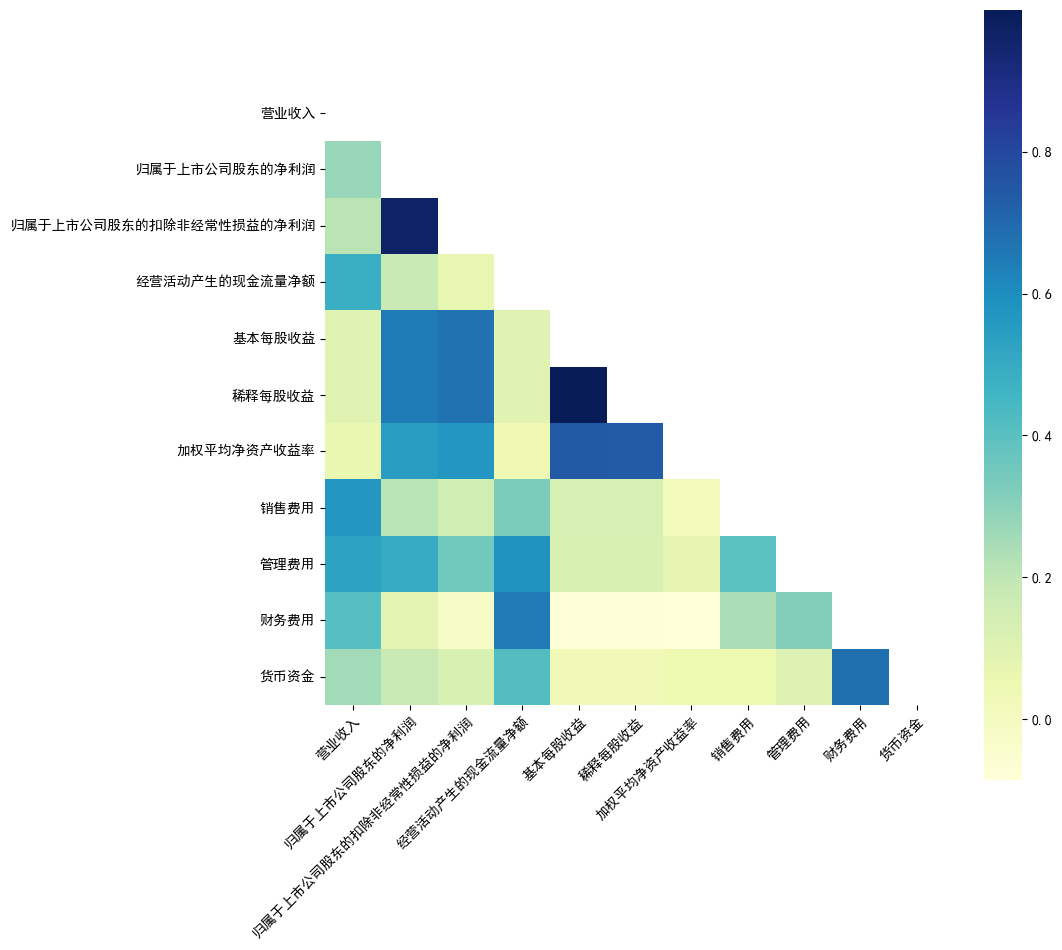

In [178]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体或者楷体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

selected_columns =[ '营业收入', '归属于上市公司股东的净利润', '归属于上市公司股东的扣除非经常性损益的净利润',
       '经营活动产生的现金流量净额', '基本每股收益', '稀释每股收益', '加权平均净资产收益率', '销售费用', '管理费用',
       '财务费用', '货币资金']
# 使用 .loc[] 方法选择特定列
corr_matrix = df_filter.loc[:, selected_columns].corr()


#mask为 和相关系数矩阵xcorr一样大的 全0(False)矩阵
mask = np.zeros_like(corr_matrix, dtype=np.bool)
# 将mask右上三角(列号》=行号)设置为True
mask[np.triu_indices_from(mask)] = True
#cmap是设置热图的颜色
#绘制热图
plt.figure(figsize=(10, 10))
g = sns.heatmap(corr_matrix, mask=mask, cmap="YlGnBu",square=True, annot=True, fmt='0.2f')
# plt.xticks(rotation=60)
plt.xticks( rotation=45, ha='right', rotation_mode='anchor')
plt.savefig(f'./data/绩效评分图/因子相关系数图.png')


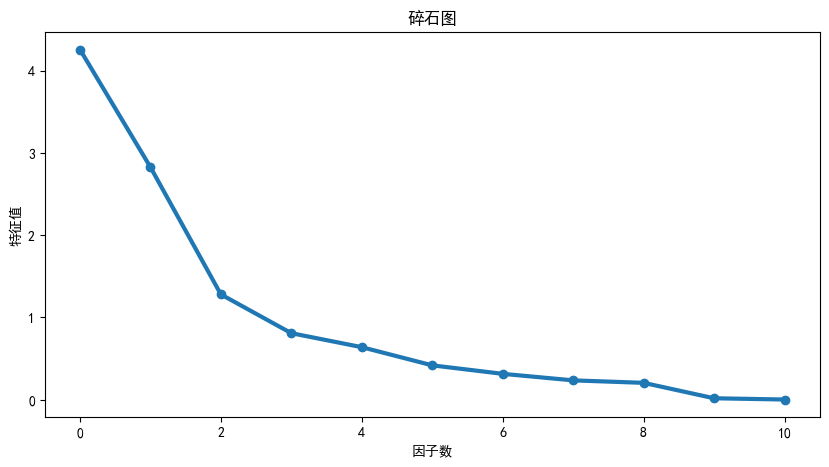

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import FactorAnalysis
# 对协方差矩阵进行特征值分解，得到每个因子的特征值
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# 将特征值按照大小排序，并绘制碎石图，以确定选择的因子数量
idx = eigenvalues.argsort()[::-1]  # 特征值从大到小排序的索引
eigenvalues_sorted = eigenvalues[idx]  # 排序后的特征值
plt.figure(figsize=(10, 5))
plt.plot(eigenvalues_sorted, 'o-', linewidth=3)
plt.title('碎石图')
plt.xlabel('因子数')
plt.ylabel('特征值')
plt.show()
